## Importing data and libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
plt.style.use('fivethirtyeight')
data = pd.read_csv('tweets.csv')
data.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,Eric Trump on @foxandfriends now!,34,953614071336701952,2018-01-17 13:04:46,Twitter for iPhone,25003,3688
1,"....we need to keep America safe, including mo...",140,953406553083777029,2018-01-16 23:20:10,Twitter for iPhone,59839,14508
2,New report from DOJ &amp; DHS shows that nearl...,144,953406423177859073,2018-01-16 23:19:39,Twitter for iPhone,73429,19922
3,"Today, it was my honor to welcome President Nu...",122,953360619834691585,2018-01-16 20:17:39,Twitter for iPhone,43768,8360
4,“President Donald J. Trump Proclaims January 1...,104,953352036309000194,2018-01-16 19:43:32,Twitter for iPhone,58308,16486


##  

## Distribution of Tweets

The length's average in tweets: 127.45


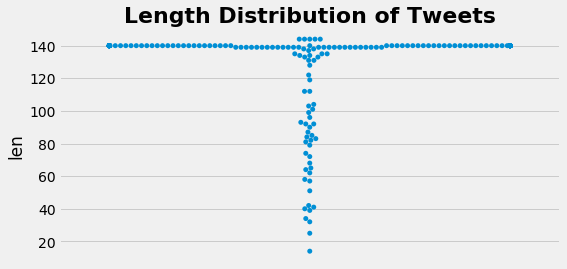

In [2]:
mean = np.mean(data['len'])
print("The length's average in tweets: {}".format(mean))
plt.figure(figsize=(8,4))
sns.swarmplot(y=data["len"])
plt.title("Length Distribution of Tweets",fontsize=22,fontweight="bold")
plt.show()

##  

## Tweet with maximum likes and retweets

In [3]:
fav_max = np.max(data["Likes"])
rt_max = np.max(data["RTs"])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

print("Tweet with more likes is: {}".format(data['Tweets'][fav]))
print("Number of likes:{}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

print("Tweet with more retweets is :\n{}".format(data["Tweets"][rt]))
print("Number of retweets:{}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

Tweet with more likes is: North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone fro… https://t.co/EvTgZxiji0
Number of likes:502835
140 characters.

Tweet with more retweets is :
North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone fro… https://t.co/EvTgZxiji0
Number of retweets:194574
140 characters.



##   

In [4]:
tlen = pd.Series(data=data['len'].values,index=data["Date"])
tfav = pd.Series(data=data['Likes'].values,index=data["Date"])
tret = pd.Series(data=data['RTs'].values,index=data['Date'])

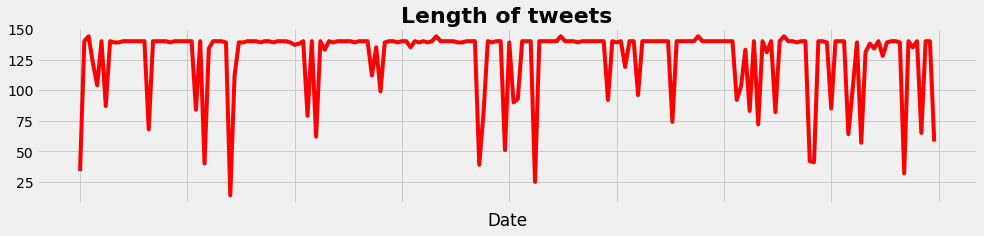

In [5]:
tlen.plot(figsize=(15,3),color='r')
plt.xticks(rotation=45)
plt.title("Length of tweets",fontsize=22,fontweight="bold")
plt.show()

##  

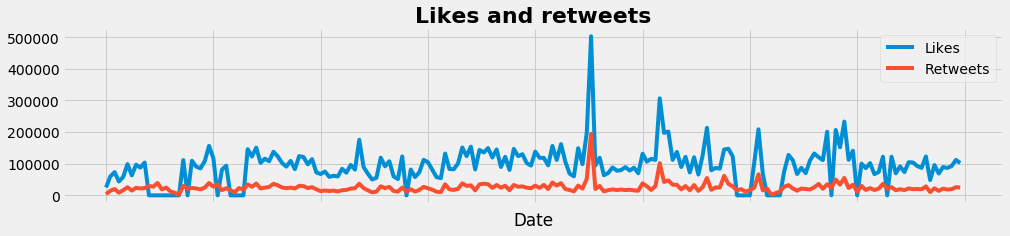

In [6]:
tfav.plot(figsize=(15,3), label="Likes", legend=True)
tret.plot(figsize=(15,3), label="Retweets", legend=True)
plt.title("Likes and retweets",fontsize=22,fontweight="bold")
plt.xticks(rotation=45)
plt.show()

##  

## Main sources of tweets

Twitter for iPhone    192
Media Studio            4
Twitter Web Client      3
Twitter for iPad        1
Name: Source, dtype: int64


C:\Users\shiva\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


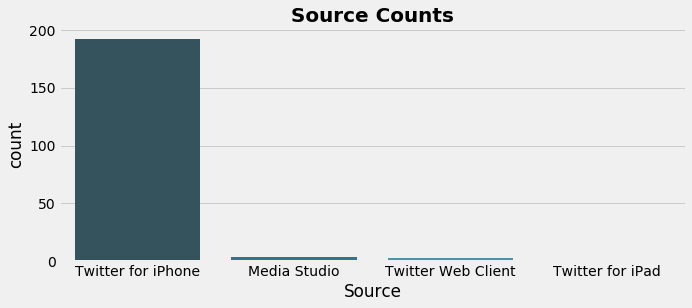

In [7]:
print(data['Source'].value_counts())
plt.figure(figsize=(10,4))
sns.countplot('Source',data = data, order = data['Source'].value_counts().index,palette="PuBuGn_d")
plt.title("Source Counts",fontsize=20,fontweight="bold")
plt.show()

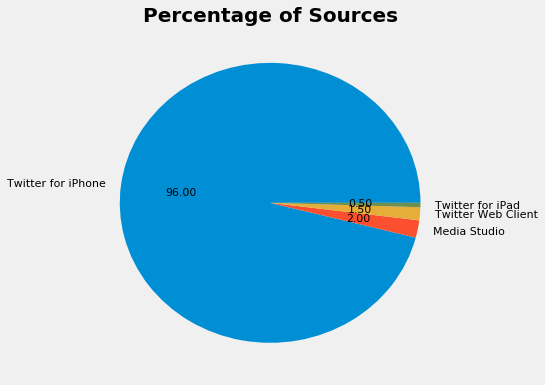

In [8]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6))
plt.ylabel("")
plt.title("Percentage of Sources",fontsize=20,fontweight="bold")
plt.show()

##  

## Cleaning tweets and getting sentiments

In [9]:
from textblob import TextBlob 
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
print(data["Tweets"][2])
print(clean_tweet(data["Tweets"][2]))

def analyize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

New report from DOJ &amp; DHS shows that nearly 3 in 4 individuals convicted of terrorism-related charges are foreign-b… https://t.co/9F2yHphpOi
New report from DOJ amp DHS shows that nearly 3 in 4 individuals convicted of terrorism related charges are foreign b


C:\Users\shiva\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


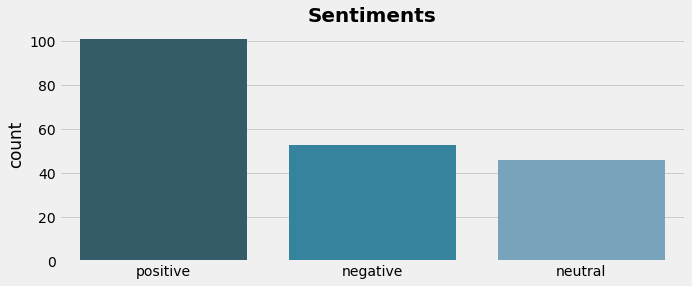

In [10]:
data["Sentiment"] = np.array([analyize_sentiment(tweet) for tweet in data['Tweets']])
plt.figure(figsize=(10,4))
sns.countplot('Sentiment',data = data, order = data['Sentiment'].value_counts().index,palette="PuBuGn_d")
plt.title("Sentiments",fontsize=20,fontweight="bold")
plt.xticks([0, 1, 2], ['positive', 'negative', 'neutral'])
plt.xlabel("")
plt.show()

## Percentage

In [11]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] < 0]
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 50.5%
Percentage of neutral tweets: 23.0%
Percentage of negative tweets: 26.5%


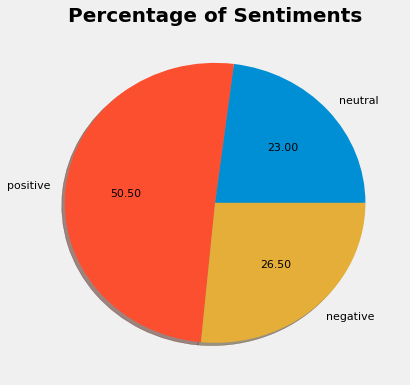

In [12]:
sentiments = []
for sentiment in data['Sentiment']:
    if sentiment not in sentiments:
        sentiments.append(sentiment)

percent = np.zeros(len(sentiments))

for source in data['Sentiment']:
    for index in range(len(sentiments)):
        if source == sentiments[index]:
            percent[index] += 1
            pass

percent /= 100


labels = ["neutral","positive","negative"]
pie_chart = pd.Series(percent, index=sentiments, name='Sentiments')
pie_chart.plot.pie(fontsize=11, autopct='%.2f',labels=labels,shadow=True, figsize=(6, 6))
plt.ylabel("")
plt.title("Percentage of Sentiments",fontsize=20,fontweight="bold")
plt.show()